In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('top-5000-youtube-channels.csv')

In [5]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [7]:
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [11]:
df.shape

(5000, 6)

In [15]:
print('Number of rows is {}'.format(df.shape[0]))
print('Number of columns is {}'.format(df.shape[1]))

Number of rows is 5000
Number of columns is 6


In [19]:
df.isnull().any()

Rank             False
Grade            False
Channel name     False
Video Uploads    False
Subscribers      False
Video views      False
dtype: bool

In [21]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [29]:
df.describe()

,Video views
count,5.000000e+03
mean,1.071449e+09
std,2.003844e+09
min,7.500000e+01
25%,1.862329e+08
50%,4.820548e+08
75%,1.124368e+09
max,4.754884e+10


In [31]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,Video views
count,"5,000.00"
mean,"1,071,449,400.15"
std,"2,003,843,972.12"
min,75.00
25%,"186,232,945.75"
50%,"482,054,780.00"
75%,"1,124,367,826.75"
max,"47,548,839,843.00"


In [33]:
df.dropna(axis=0, inplace=True)
df['Rank'] = df['Rank'].str[0:-2] 
df['Rank'] = df['Rank'].str.replace(',','')

In [35]:
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,4996,B+,Uras Benlioğlu,706,2072942,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,4998,B+,Mastersaint,110,3265735,311758426
4998,4999,B+,Bruce McIntosh,3475,32990,14563764
4999,5000,B+,SehatAQUA,254,21172,73312511


In [39]:
df.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [45]:
df=df.replace('--', np.nan,regex=True)
df.dropna(axis=0, inplace=True)

In [47]:
df['Subscribers'] = df['Subscribers'].astype('int')
df['Video Uploads'] = df['Video Uploads'].astype('int')

In [49]:
df.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads     int64
Subscribers       int64
Video views       int64
dtype: object

In [51]:
df['Rank'] = df['Rank'].astype('int')


In [57]:
df.dtypes

Rank              int64
Grade            object
Channel name     object
Video Uploads     int64
Subscribers       int64
Video views       int64
dtype: object

In [59]:
df[df['Video Uploads'] > 200000 ]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
323,324,A,GMA News,269065,2599175,2786949164
1149,1150,A-,YTN NEWS,355996,820108,1640347646
1888,1889,A-,SBS Entertainment,200928,1809240,1477119313
2223,2224,B+,SBS Drama,335521,1418619,1565758044
2956,2957,B+,MLB,267649,1434206,1329206392
3216,3217,B+,Various Artists - Topic,203934,26013,13049365
3453,3454,B+,AP Archive,422326,746325,548619569
4112,4113,B+,民視綜合頻道,208265,383022,659944536
4583,4584,B+,Various Artists - Topic,207072,30224,28670469


In [61]:
df['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [63]:
df['Grade'].map({'A++ ':5, 'A+ ':4, 'A ':3, 'A- ':2, 'B+ ':1})

0       5
1       5
2       5
3       5
4       5
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: Grade, Length: 4610, dtype: int64

In [65]:
df_backup = df.copy()


In [67]:
df_backup['Grade'] = df_backup['Grade'].map({'A++ ':5, 'A+ ':4, 'A ':3, 'A- ':2, 'B+ ':1})

In [69]:
df_backup.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,5,Zee TV,82757,18752951,20869786591
1,2,5,T-Series,12661,61196302,47548839843
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,5,SET India,27323,31180559,22675948293
4,5,5,WWE,36756,32852346,26273668433


In [71]:
df['Grade'] = df['Grade'].map({'A++ ':5, 'A+ ':4, 'A ':3, 'A- ':2, 'B+ ':1})

In [73]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,5,Zee TV,82757,18752951,20869786591
1,2,5,T-Series,12661,61196302,47548839843
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,5,SET India,27323,31180559,22675948293
4,5,5,WWE,36756,32852346,26273668433


In [79]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [87]:
df['Avg_views'] = df['Video views']/df['Video Uploads']

In [89]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
0,1,5,Zee TV,82757,18752951,20869786591,"252,181.53"
1,2,5,T-Series,12661,61196302,47548839843,"3,755,535.89"
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,"26,255,509.60"
3,4,5,SET India,27323,31180559,22675948293,"829,921.62"
4,5,5,WWE,36756,32852346,26273668433,"714,813.05"


In [ ]:
#max number of video uploads

In [95]:
df.sort_values(by='Video Uploads', ascending=False).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
3453,3454,1,AP Archive,422326,746325,548619569,"1,299.04"
1149,1150,2,YTN NEWS,355996,820108,1640347646,"4,607.77"
2223,2224,1,SBS Drama,335521,1418619,1565758044,"4,666.65"
323,324,3,GMA News,269065,2599175,2786949164,"10,357.90"
2956,2957,1,MLB,267649,1434206,1329206392,"4,966.23"


In [97]:
#min number of video uploads

In [99]:
df.sort_values(by='Video Uploads', ascending=True).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
4474,4475,1,hyghhopes,1,15325,14842098,"14,842,098.00"
628,629,3,cocoz toon,1,2162992,333012122,"333,012,122.00"
4100,4101,1,DenzelCurryVEVO,1,8012,25878252,"25,878,252.00"
4975,4976,1,Funny Kids,1,150091,21933876,"21,933,876.00"
2404,2405,1,ItsHARSH007 Gaming,1,23499,75,75.00


In [105]:
df.dtypes

Rank               int64
Grade              int64
Channel name      object
Video Uploads      int64
Subscribers        int64
Video views        int64
Avg_views        float64
dtype: object

In [114]:
df

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
0,1,5,Zee TV,82757,18752951,20869786591,"252,181.53"
1,2,5,T-Series,12661,61196302,47548839843,"3,755,535.89"
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,"26,255,509.60"
3,4,5,SET India,27323,31180559,22675948293,"829,921.62"
4,5,5,WWE,36756,32852346,26273668433,"714,813.05"
...,...,...,...,...,...,...,...
4995,4996,1,Uras Benlioğlu,706,2072942,441202795,"624,933.14"
4996,4997,1,HI-TECH MUSIC LTD,797,1055091,377331722,"473,440.05"
4997,4998,1,Mastersaint,110,3265735,311758426,"2,834,167.51"
4998,4999,1,Bruce McIntosh,3475,32990,14563764,"4,191.01"


<Axes: xlabel='Grade', ylabel='Subscribers'>

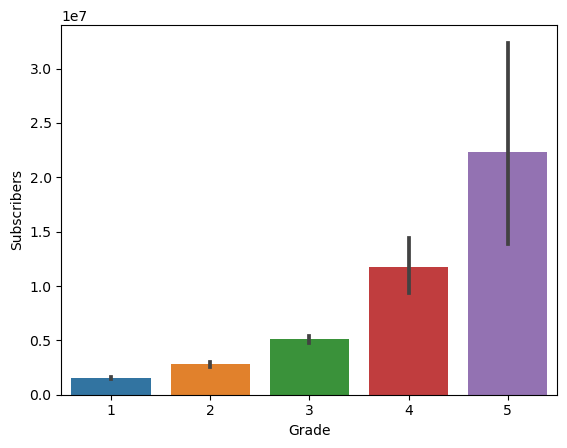

In [128]:
df.columns
sns.barplot(x='Grade', y='Subscribers', data=df)

<Axes: xlabel='Video Uploads', ylabel='Avg_views'>

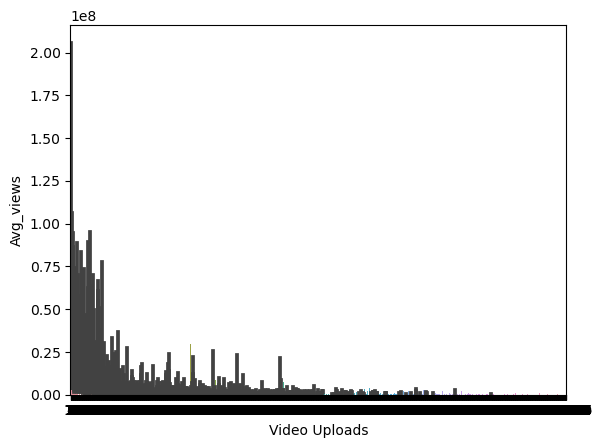

In [133]:
sns.barplot(x='Video Uploads', y='Avg_views', data=df)

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
top_5=df.sort_values(by='Video Uploads',ascending=False).head()

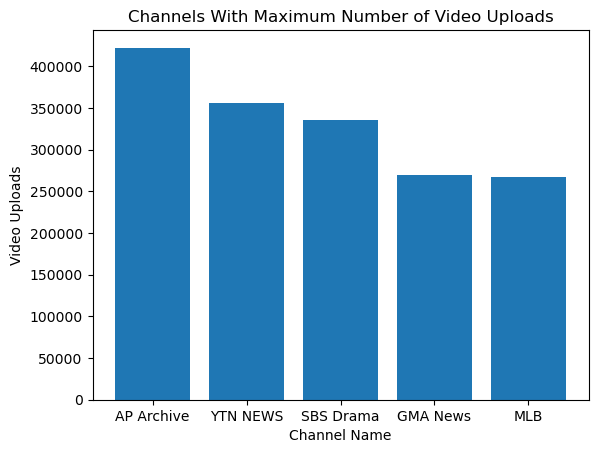

In [143]:
x=top_5['Channel name']
y=top_5['Video Uploads']
plt.xlabel('Channel Name')
plt.ylabel('Video Uploads')
plt.title('Channels With Maximum Number of Video Uploads')
plt.bar(x,y)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


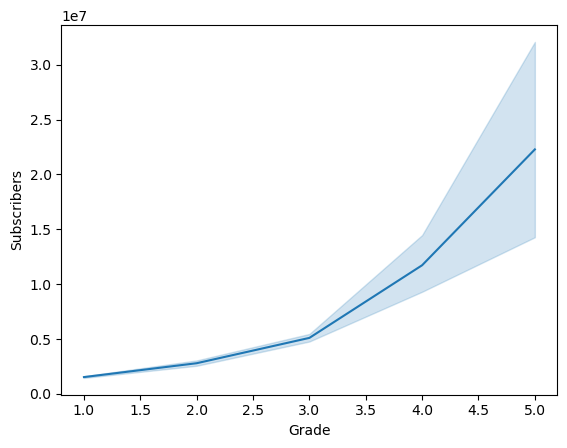

In [158]:
sns.lineplot(x="Grade", y="Subscribers", data=df)
plt.show()


In [168]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'Avg_views'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


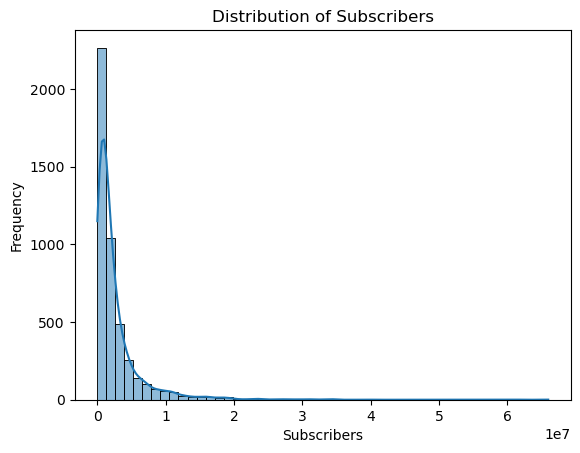

In [170]:
sns.histplot(df['Subscribers'], bins=50, kde=True)
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.show()

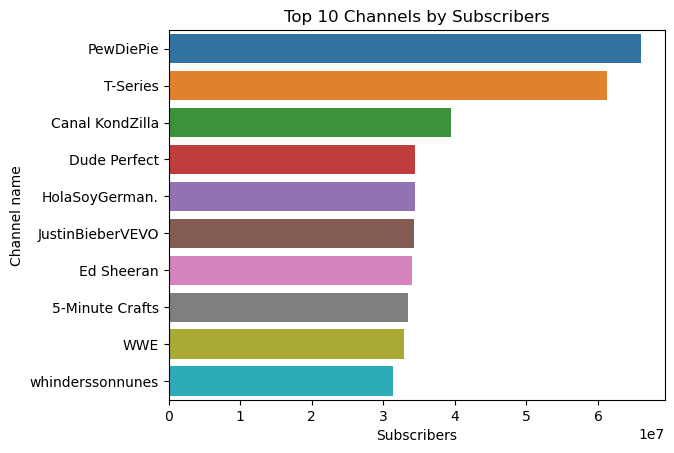

In [172]:
top10 = df.nlargest(10, 'Subscribers')
sns.barplot(x='Subscribers', y='Channel name', data=top10)
plt.title('Top 10 Channels by Subscribers')
plt.show()


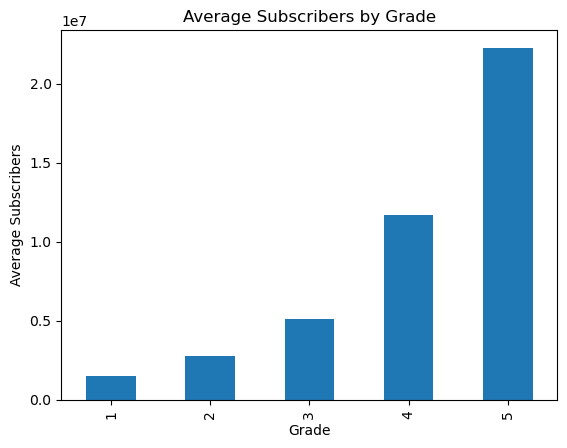

In [184]:
avg_subs_by_grade = df.groupby('Grade')['Subscribers'].mean().sort_values()
avg_subs_by_grade.plot(kind='bar')
plt.title('Average Subscribers by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Subscribers')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


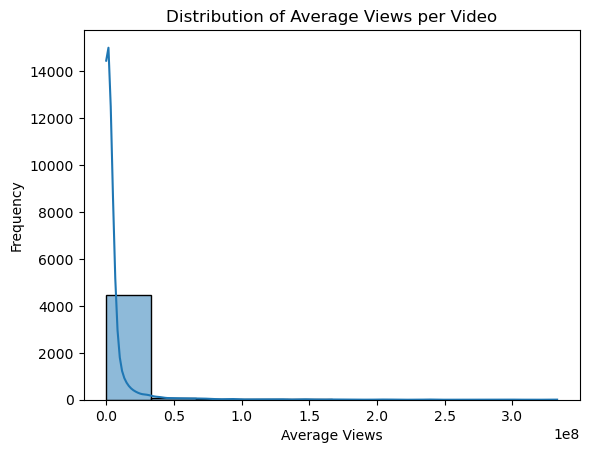

In [188]:
df['Avg_views'] = df['Video views'] / df['Video Uploads']
sns.histplot(df['Avg_views'], bins=10, kde=True)
plt.title('Distribution of Average Views per Video')
plt.xlabel('Average Views')
plt.ylabel('Frequency')
plt.show()


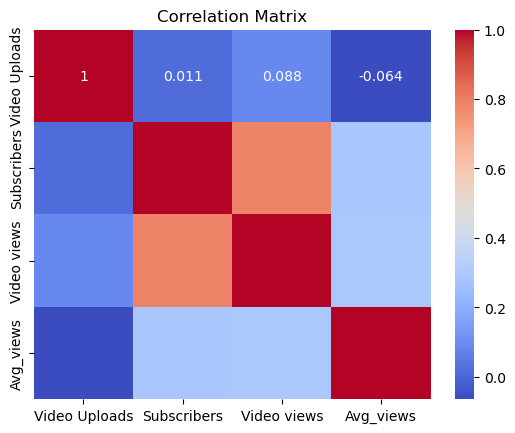

In [190]:
correlation_matrix = df[['Video Uploads', 'Subscribers', 'Video views', 'Avg_views']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [192]:
df['Growth_ratio'] = df['Subscribers'] / df['Video Uploads']
high_growth_channels = df[df['Growth_ratio'] > df['Growth_ratio'].quantile(0.9)]


In [198]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views,Growth_ratio
0,1,5,Zee TV,82757,18752951,20869786591,"252,181.53",226.60
1,2,5,T-Series,12661,61196302,47548839843,"3,755,535.89","4,833.45"
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,"26,255,509.60","51,577.08"
3,4,5,SET India,27323,31180559,22675948293,"829,921.62","1,141.18"
4,5,5,WWE,36756,32852346,26273668433,"714,813.05",893.80


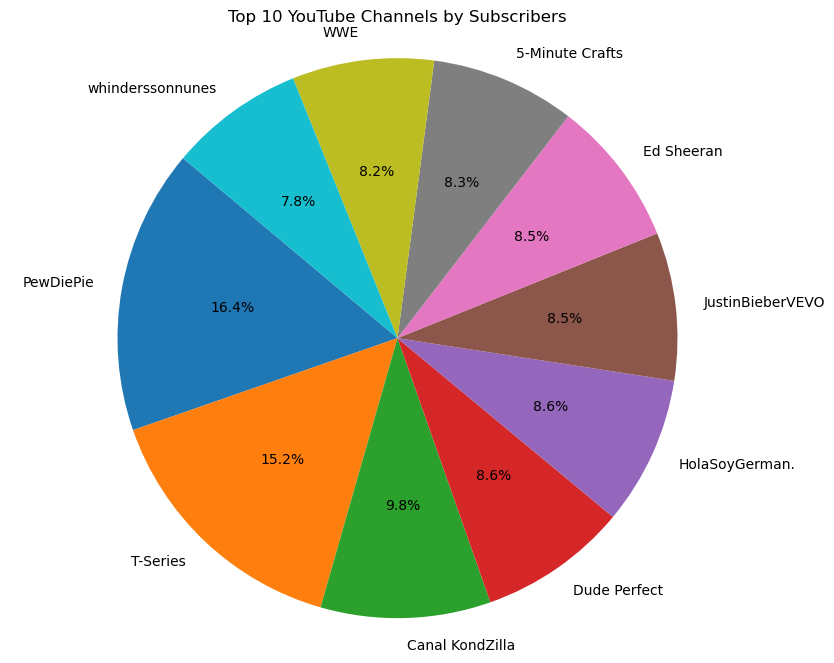

In [200]:
top10_channels = df.nlargest(10, 'Subscribers')

# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(top10_channels['Subscribers'], labels=top10_channels['Channel name'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 YouTube Channels by Subscribers')
plt.axis('equal')  
plt.show()

In [202]:
df['Avg_subscribers'] = df['Subscribers'] / df['Video Uploads']


In [ ]:
#avergae subscribers

In [204]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views,Growth_ratio,Avg_subscribers
0,1,5,Zee TV,82757,18752951,20869786591,"252,181.53",226.60,226.60
1,2,5,T-Series,12661,61196302,47548839843,"3,755,535.89","4,833.45","4,833.45"
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,"26,255,509.60","51,577.08","51,577.08"
3,4,5,SET India,27323,31180559,22675948293,"829,921.62","1,141.18","1,141.18"
4,5,5,WWE,36756,32852346,26273668433,"714,813.05",893.80,893.80


In [206]:
#number of channels in each grade

In [214]:
grade_counts = df['Grade'].value_counts().sort_index()


In [216]:
grade_counts

Grade
1    2722
2     941
3     897
4      40
5      10
Name: count, dtype: int64

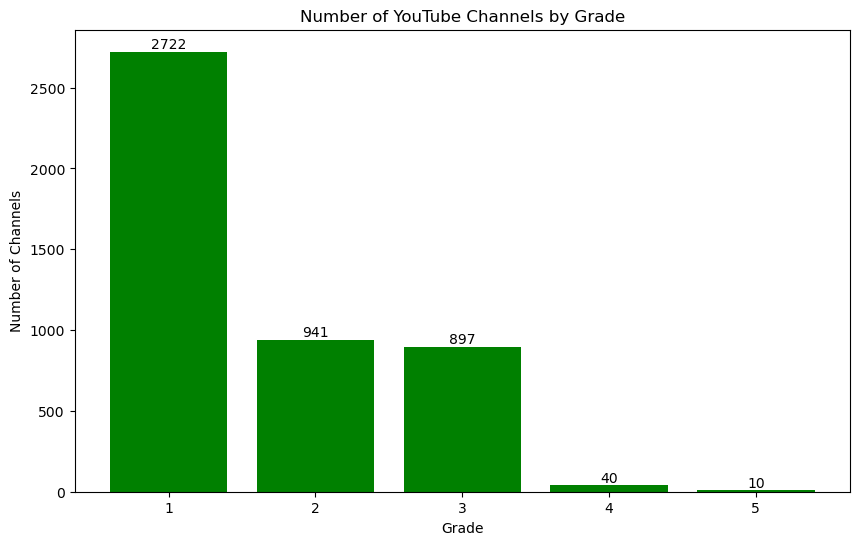

In [224]:
# Bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(grade_counts.index, grade_counts.values, color='green')

# Add numbers on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Grade')
plt.ylabel('Number of Channels')
plt.title('Number of YouTube Channels by Grade')
plt.xticks(rotation=0)  # Ensure x labels are not rotated
plt.show()